# 🧑‍🎓: $2003037$

# 📦 Imports and Interfaces
> To remove unnecessary formatting, plotting codes from main algorithm and testing

## Import and plotting

In [ ]:
# MUST INSTALL
!pip install lcapy

In [ ]:
import numpy as np
import sympy as sp
import scipy as sc
import lcapy as lc
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from typing import List, Tuple, Dict, Union, Optional, Any

class DSPPlotter:
    def __init__(self, fig_size: Tuple[int, int]=(12, 6), style: str='seaborn-v0_8-darkgrid'):
        self.fig_size = fig_size
        plt.style.use(style)

    def plot_sequences(self, sequences: Dict[str, np.ndarray],
                     title: str="Input Sequences",
                     xlabel: str="n",
                     ylabel: str="Amplitude"):
        plt.figure(figsize=self.fig_size)

        for name, seq in sequences.items():
            n = np.arange(len(seq))
            markerline, stemlines, baseline = plt.stem(n, seq, label=name)
            plt.setp(markerline, markersize=8)
            plt.setp(stemlines, linewidth=2)

        plt.title(title, fontsize=16, fontweight='bold')
        plt.xlabel(xlabel, fontsize=14)
        plt.ylabel(ylabel, fontsize=14)
        plt.grid(True, alpha=0.3, linestyle='--')
        plt.legend(fontsize=12)
        plt.tight_layout()
        plt.show()

    def compare_convolutions(self, linear_conv: np.ndarray, circular_conv: np.ndarray,
                           title: str="Linear vs Circular Convolution"):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=self.fig_size)

        # Linear convolution
        n1 = np.arange(len(linear_conv))
        markerline, stemlines, baseline = ax1.stem(n1, linear_conv)
        plt.setp(markerline, markersize=8)
        plt.setp(stemlines, linewidth=2)
        ax1.set_title("Linear Convolution", fontsize=14, fontweight='bold')
        ax1.set_xlabel("n", fontsize=12)
        ax1.set_ylabel("Amplitude", fontsize=12)
        ax1.grid(True, alpha=0.3, linestyle='--')

        # Circular convolution
        n2 = np.arange(len(circular_conv))
        markerline, stemlines, baseline = ax2.stem(n2, circular_conv)
        plt.setp(markerline, markersize=8)
        plt.setp(stemlines, linewidth=2)
        ax2.set_title("Circular Convolution", fontsize=14, fontweight='bold')
        ax2.set_xlabel("n", fontsize=12)
        ax2.grid(True, alpha=0.3, linestyle='--')

        plt.suptitle(title, fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

    def compare_method_results(self, method1_name: str, method1_result: np.ndarray,
                             method2_name: str, method2_result: np.ndarray,
                             title: str="Method Comparison"):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=self.fig_size)

        # Method 1
        n1 = np.arange(len(method1_result))
        markerline, stemlines, baseline = ax1.stem(n1, method1_result)
        plt.setp(markerline, markersize=8)
        plt.setp(stemlines, linewidth=2)
        ax1.set_title(method1_name, fontsize=14, fontweight='bold')
        ax1.set_xlabel("n", fontsize=12)
        ax1.set_ylabel("Value", fontsize=12)
        ax1.grid(True, alpha=0.3, linestyle='--')

        # Method 2
        n2 = np.arange(len(method2_result))
        markerline, stemlines, baseline = ax2.stem(n2, method2_result)
        plt.setp(markerline, markersize=8)
        plt.setp(stemlines, linewidth=2)
        ax2.set_title(method2_name, fontsize=14, fontweight='bold')
        ax2.set_xlabel("n", fontsize=12)
        ax2.grid(True, alpha=0.3, linestyle='--')

        plt.suptitle(title, fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

    def plot_correlation(self, lags: np.ndarray, correlation: np.ndarray,
                       title: str="Correlation Result"):
        plt.figure(figsize=self.fig_size)

        markerline, stemlines, baseline = plt.stem(lags, correlation)
        plt.setp(markerline, markersize=8)
        plt.setp(stemlines, linewidth=2)

        plt.title(title, fontsize=16, fontweight='bold')
        plt.xlabel("Lag", fontsize=14)
        plt.ylabel("Correlation Value", fontsize=14)
        plt.grid(True, alpha=0.3, linestyle='--')
        plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)  # Mark zero lag
        plt.tight_layout()
        plt.show()

    def compare_correlations(self, auto_corr: np.ndarray, cross_corr: np.ndarray,
                           auto_lags: np.ndarray, cross_lags: np.ndarray):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=self.fig_size)

        # Auto-correlation
        markerline, stemlines, baseline = ax1.stem(auto_lags, auto_corr)
        plt.setp(markerline, markersize=8)
        plt.setp(stemlines, linewidth=2)
        ax1.set_title("Auto-correlation", fontsize=14, fontweight='bold')
        ax1.set_xlabel("Lag", fontsize=12)
        ax1.set_ylabel("Correlation Value", fontsize=12)
        ax1.grid(True, alpha=0.3, linestyle='--')
        ax1.axvline(x=0, color='r', linestyle='--', alpha=0.5)

        # Cross-correlation
        markerline, stemlines, baseline = ax2.stem(cross_lags, cross_corr)
        plt.setp(markerline, markersize=8)
        plt.setp(stemlines, linewidth=2)
        ax2.set_title("Cross-correlation", fontsize=14, fontweight='bold')
        ax2.set_xlabel("Lag", fontsize=12)
        ax2.grid(True, alpha=0.3, linestyle='--')
        ax2.axvline(x=0, color='r', linestyle='--', alpha=0.5)

        plt.suptitle("Correlation Analysis", fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

    def compare_inverse_methods(self, partial_values, library_values, n_values):
        # Create figure
        plt.figure(figsize=(10, 6))

        # Plot both methods
        plt.plot(n_values, partial_values, 'o-', label='Partial Fraction Method', color='blue', linewidth=2)
        plt.plot(n_values, library_values, 'x--', label='Library Method', color='red', linewidth=2)

        # Add labels and title
        plt.xlabel('n')
        plt.ylabel('x[n]')
        plt.title('Comparison of Inverse Z-Transform Methods')
        plt.grid(True)
        plt.legend()

        # Add value annotations
        for i, (v1, v2) in enumerate(zip(partial_values, library_values)):
            plt.text(i+0.1, v1, f'{v1:.4f}', fontsize=8)
            plt.text(i-0.3, v2, f'{v2}', fontsize=8, color='red')

        # Show the plot
        plt.tight_layout()
        plt.show()

        # Print numerical comparison
        print("\nComparison of Methods:")
        print("n | Manual Method | Library Method | Difference")
        print("-" * 50)
        for i in range(len(n_values)):
            diff = abs(partial_values[i] - library_values[i])
            print(f"{i} | {partial_values[i]:.6f} | {library_values[i]:.6f} | {diff:.8f}")

    def compare_system_outputs(self, n: np.ndarray,
                             method1_name: str, y1: np.ndarray,
                             method2_name: str, y2: np.ndarray):
        plt.figure(figsize=self.fig_size)

        plt.stem(n, y1, linefmt='g-', markerfmt='go', basefmt='r-', label=method1_name)
        plt.stem(n, y2, linefmt='r--', markerfmt='rx', basefmt='r-', label=method2_name)

        plt.title("System Response Comparison", fontsize=16, fontweight='bold')
        plt.xlabel("n", fontsize=14)
        plt.ylabel("Output y[n]", fontsize=14)
        plt.grid(True, alpha=0.3, linestyle='--')
        plt.legend(fontsize=12)
        plt.tight_layout()
        plt.show()

    def plot_system_response(self, n: np.ndarray, x: np.ndarray, y: np.ndarray):

        plt.figure(figsize=self.fig_size)

        plt.subplot(2, 1, 1)
        markerline, stemlines, baseline = plt.stem(n, x)
        plt.setp(markerline, markersize=8)
        plt.setp(stemlines, linewidth=2)
        plt.title("Direct Method y[n]", fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3, linestyle='--')

        plt.subplot(2, 1, 2)
        markerline, stemlines, baseline = plt.stem(n, y)
        plt.setp(markerline, markersize=8)
        plt.setp(stemlines, linewidth=2)
        plt.title("Module Method y[n]", fontsize=14, fontweight='bold')
        plt.xlabel("n", fontsize=12)
        plt.grid(True, alpha=0.3, linestyle='--')

        plt.suptitle("System Response", fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

    def plot_dfs(self, k: np.ndarray, X_mag: np.ndarray, X_phase: np.ndarray):

        plt.figure(figsize=self.fig_size)

        plt.subplot(2, 1, 1)
        markerline, stemlines, baseline = plt.stem(k, X_mag)
        plt.setp(markerline, markersize=8)
        plt.setp(stemlines, linewidth=2)
        plt.title("DFS Magnitude Spectrum", fontsize=14, fontweight='bold')
        plt.ylabel("Magnitude", fontsize=12)
        plt.grid(True, alpha=0.3, linestyle='--')

        plt.subplot(2, 1, 2)
        markerline, stemlines, baseline = plt.stem(k, X_phase)
        plt.setp(markerline, markersize=8)
        plt.setp(stemlines, linewidth=2)
        plt.title("DFS Phase Spectrum", fontsize=14, fontweight='bold')
        plt.xlabel("Frequency Index (k)", fontsize=12)
        plt.ylabel("Phase (radians)", fontsize=12)
        plt.grid(True, alpha=0.3, linestyle='--')

        plt.suptitle("Discrete Fourier Series Analysis", fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

    def compare_dfs_methods(self, k: np.ndarray,
                          direct_mag: np.ndarray, direct_phase: np.ndarray,
                          fft_mag: np.ndarray, fft_phase: np.ndarray):

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

        # Direct method magnitude
        markerline, stemlines, baseline = ax1.stem(k, direct_mag)
        plt.setp(markerline, markersize=8)
        plt.setp(stemlines, linewidth=2)

# Plotting object initialized
plotter = DSPPlotter(fig_size=(8, 4))

## ♻️ Direct Methods (Convolution, Correlations, Z-transformation)

In [ ]:
def conv(x, h):
  result = np.zeros(len(x)+len(h)-1)

  # Calculate angular sums directly
  for i in range(len(x)):
      for j in range(len(h)):
          result[i+j] += x[i] * h[j]

  return result

def circularConvMatrix(x, h, axis=0):
  N = len(x)
  h = np.reshape(h, (len(h), 1))
  x_circulant = np.zeros((N, N))

  for i in range(N):
      x_circulant[:,i] = np.roll(x, i)

  y = np.dot(x_circulant, h).flatten().tolist()

  return y

def crossCorrelation(x, y):
  y = y[::-1]
  result = conv(x, y)
  return result

def autoCorrelation(x):
  result = crossCorrelation(x, x)
  return result

def partial_frac_exp(func):
  z, n = sp.symbols('z n')
  partial = sp.apart(func/z)*z
  return (0.5**n)*(partial/(z/(z-0.5)))

def iter_comput(eqn, N):
  x_n_1 = 0
  y_n_1 = 0
  y_n = np.zeros(N)

  for i in range(N):
    x_n = 1*(i==0)
    y_n[i] = float(eqn.subs(x_1, x_n_1).subs(y_1, y_n_1).subs(x, x_n))
    x_n_1 = x_n
    y_n_1 = y_n[i]

  return y_n

def DFS(signal, N):
  X = np.zeros(N, dtype=complex)
  for k in range(N):
    for n in range(N):
      X[k] += signal[n] * np.exp(-1j * 2* np.pi * k * n / N)
    X[k] /= N
  return X


# ⁉️ Q&A part

## 1️⃣ Q1: Linear and Circular Convolution of Two Signals

Linear convolution:
	Direct Method: [ 0.   1.   2.5  8.  13.5 14.  16. ]
	NumPy Method: [ 0.   1.   2.5  8.  13.5 14.  16. ]
Circular convolution:
	Direct Method: [13.5, 15.0, 18.5, 8.0]
	NumPy Method: [13.5, 15.0, 18.5, 8.0]


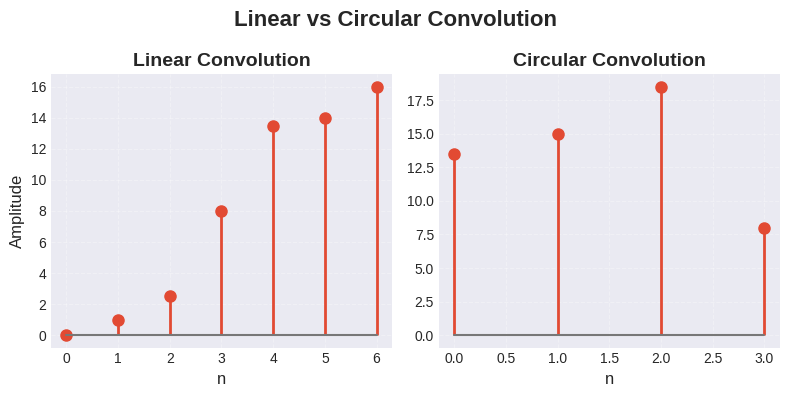

In [ ]:
x_n = [1, 2, 3, 4]
h_n = [0, 1, 0.5, 4]

# linear convolution
print("Linear convolution:")
#> Direct Method
result1 = conv(x_n, h_n)
print(f"\tDirect Method: {result1}")
#> Using NumPy
result2 = np.convolve(x_n, h_n)
print(f"\tNumPy Method: {result2}")


# Circular Convolution
print("Circular convolution:")
#> Direct Method
cirConv = circularConvMatrix(x_n, h_n)
print(f"\tDirect Method: {cirConv}")
#> Using NumPy
X = np.fft.fft(x_n)
H = np.fft.fft(h_n)
cirConv2 = (np.fft.ifft(X * H).real).tolist()
print(f"\tNumPy Method: {cirConv2}")


# Plot
plotter.compare_convolutions(result1, cirConv)


## 2️⃣ Q2: Auto-correlation and Cross-correlation of Signals

Auto-correlation:
	Direct Method: [15. 11.  2. 13. 39. 13.  2. 11. 15.]
	NumPy Method: [15 11  2 13 39 13  2 11 15]
Cross-correlation:
	Direct Method: [15. 17. 13. 19. 38. 27. 19. 12.  5.]
	NumPy Method: [15 17 13 19 38 27 19 12  5]


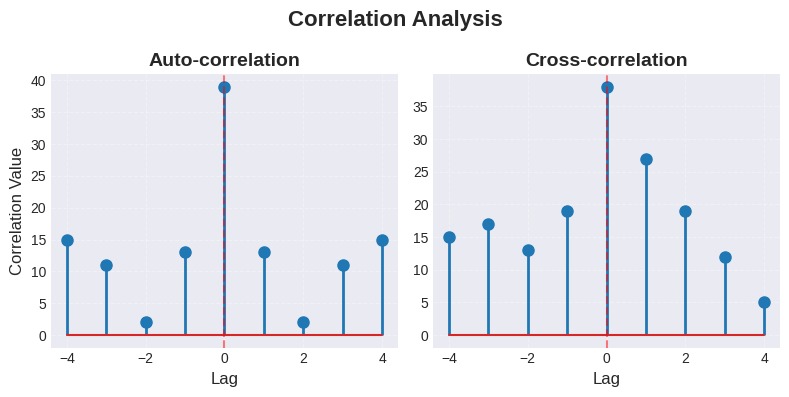

In [ ]:
x_n = [3, 1, 0, 2, 5]
y_n = [1, 2, 3, 4, 5]

# Auto correlation
print("Auto-correlation:")
#> Direct Method
autoCorr = autoCorrelation(x_n)
print(f"\tDirect Method: {autoCorr}")
#> Using NumPy
autoCorr2 = np.correlate(x_n, x_n, mode='full')
print(f"\tNumPy Method: {autoCorr2}")

# Cross Correlation
print("Cross-correlation:")
#> Direct Method
crossCorr = crossCorrelation(x_n, y_n)
print(f"\tDirect Method: {crossCorr}")
#> Using NumPy
crossCorr2 = np.correlate(x_n, y_n, mode='full')
print(f"\tNumPy Method: {crossCorr2}")

# Plot
plotter.compare_correlations(autoCorr, crossCorr, np.arange(-4, 5), np.arange(-4, 5))

## 3️⃣ Q3: Z-Transform and Inverse Z-Transform Using Partial Fractions

Z-Transfrom of (0.5^n)*u(n) => z/(z - 0.5)
Inverse Z-transform: 0.5**n
(Library Func) Inverse Z-Transform: Piecewise((2**(-n), n >= 0))




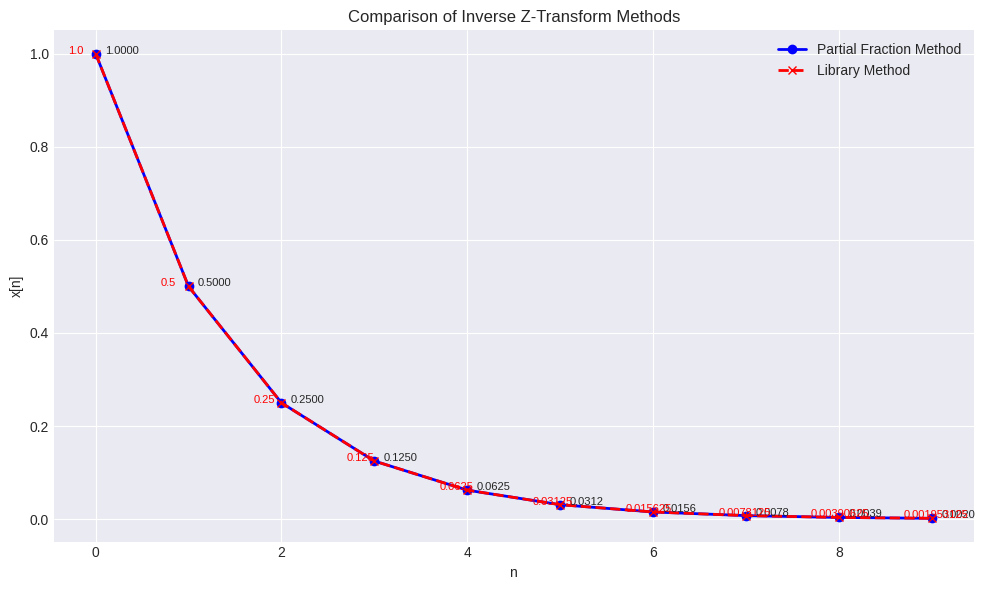


Comparison of Methods:
n | Manual Method | Library Method | Difference
--------------------------------------------------
0 | 1.000000 | 1.000000 | 0.00000000
1 | 0.500000 | 0.500000 | 0.00000000
2 | 0.250000 | 0.250000 | 0.00000000
3 | 0.125000 | 0.125000 | 0.00000000
4 | 0.062500 | 0.062500 | 0.00000000
5 | 0.031250 | 0.031250 | 0.00000000
6 | 0.015625 | 0.015625 | 0.00000000
7 | 0.007812 | 0.007812 | 0.00000000
8 | 0.003906 | 0.003906 | 0.00000000
9 | 0.001953 | 0.001953 | 0.00000000


In [ ]:
# ❌THERE IS NO `sympy.inverse_z_transform()` function SIR !!!
# So I'm going to use lacapy

x = 0.5
# Keep separate symbols for sympy and lcapy
z_sympy, n_sympy = sp.symbols('z n')
z_lcapy = lc.z
n_lcapy = lc.n


# Z-Transform
z_t = z_sympy/(z_sympy-x)
print(f"Z-Transfrom of ({x}^n)*u(n) => {z_t}")

# The Inverse Z-transform using partial fraction expansion
z_inverse = sp.simplify(partial_frac_exp(z_t))
print(f"Inverse Z-transform: {z_inverse}")

# Using library method
x_n = (0.5)**n_lcapy
X_z = x_n.ZT()
inv_X_z = X_z.IZT()
print(f"(Library Func) Inverse Z-Transform: {inv_X_z}\n\n")

N = np.arange(0, 10)
# Use sympy's 'n' for the substitution
partialVal = [z_inverse.subs(n_sympy, i) for i in N]
inv_X_z_val = [float(inv_X_z(i).expr) for i in N]

# Plot
plotter.compare_inverse_methods(partialVal, inv_X_z_val, N)

## 4️⃣ Q4: Implementation of Discrete-Time System Using Difference Equation

Direct Method: [1.         2.5        1.25       0.625      0.3125     0.15625
 0.078125   0.0390625  0.01953125 0.00976562 0.00488281]
Module Method: [1.         2.5        1.25       0.625      0.3125     0.15625
 0.078125   0.0390625  0.01953125 0.00976562 0.00488281]


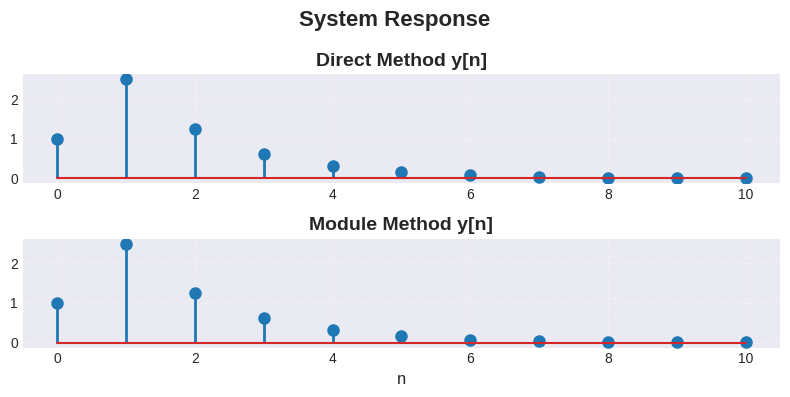

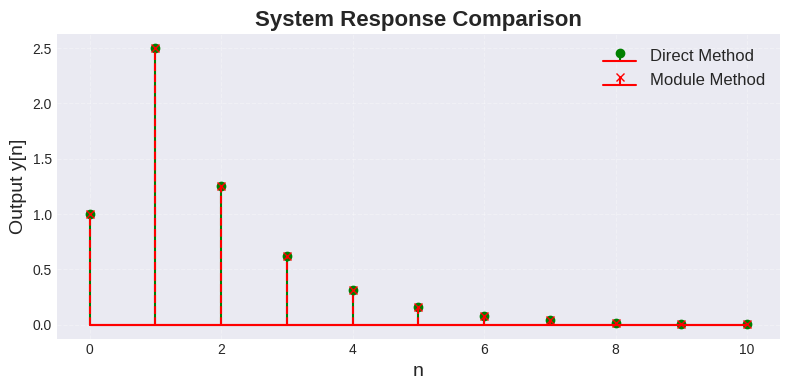

In [ ]:
x, y, x_1, y_1 = sp.symbols('x y x_1 y_1')
# eqn
y = 0.5*y_1 + x + 2*x_1
N = 11

# Direct Method
y_res = iter_comput(y, N)
print(f"Direct Method: {y_res}")

# Using Module
x_n = np.zeros(N)
x_n[0] = 1
a = [1, -0.5]
b = [1, 2]

y_res2 = sc.signal.lfilter(b, a, x_n)
print(f"Module Method: {y_res2}")

# Plot
plotter.plot_system_response(np.arange(0, N), y_res, y_res2)
plotter.compare_system_outputs(np.arange(0, N),
                               method1_name="Direct Method", y1=y_res,
                               method2_name="Module Method", y2=y_res2)

## 5️⃣ Q5: Implementation of Discrete Fourier Series (DFS)

Direct Method [-6.93889390e-17+0.00000000e+00j  5.00000000e-01-4.16333634e-17j
 -4.19845767e-17-1.38777878e-17j  8.32667268e-17-4.16333634e-17j
  1.38777878e-17-6.12323400e-17j  2.08166817e-16-1.31838984e-16j
  1.34535513e-16-9.71445147e-17j  5.00000000e-01+5.68989300e-16j]
Module Method [-4.30636606e-17+0.00000000e+00j  5.00000000e-01-5.83717456e-17j
  1.53080850e-17+0.00000000e+00j  0.00000000e+00+2.86059436e-18j
  1.24474906e-17+0.00000000e+00j  0.00000000e+00-2.86059436e-18j
  1.53080850e-17+0.00000000e+00j  5.00000000e-01+5.83717456e-17j]


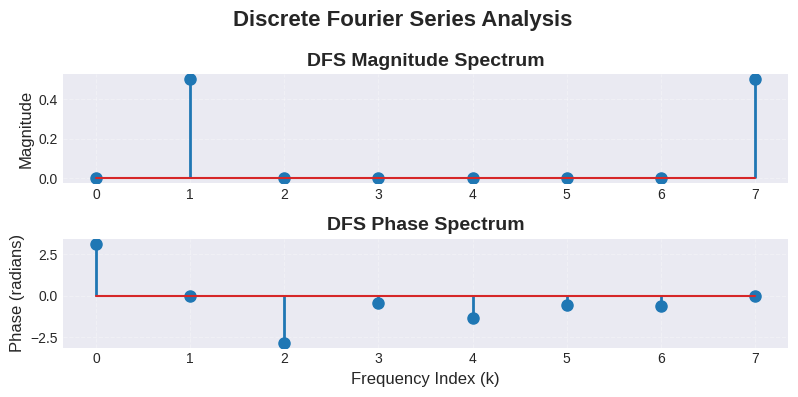


DFS Coefficients:
X[0] = -6.938893903907228e-17 + 0.0j
X[1] = 0.5 + -4.163336342344337e-17j
X[2] = -4.1984576733649125e-17 + -1.3877787807814457e-17j
X[3] = 8.326672684688674e-17 + -4.163336342344337e-17j
X[4] = 1.3877787807814457e-17 + -6.123233995736765e-17j
X[5] = 2.0816681711721685e-16 + -1.3183898417423734e-16j
X[6] = 1.3453551329011214e-16 + -9.71445146547012e-17j
X[7] = 0.5000000000000001 + 5.689893001203927e-16j


In [ ]:
N = 8
n = np.arange(N)
x = np.cos(2*np.pi*n/N)

# Direct Method
X = DFS(x, N)
print(f"Direct Method {X}")

# Using Module:
X2 = np.fft.fft(x)/N
print(f"Module Method {X2}")

# Plot
k = np.arange(N)
X_mag = np.abs(X)
X_phase = np.angle(X)
plotter.plot_dfs(k, X_mag, X_phase)

# Coefficients
print("\nDFS Coefficients:")
for i, coef in enumerate(X):
  print(f"X[{i}] = {coef.real} + {coef.imag}j")